# Data Preprocessing

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, confusion_matrix, log_loss, f1_score

## Import and Read Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/cleaned_agrifood_data.csv'
df = pd.read_csv(file_path)

## Display and describe dataset

In [ ]:
df.head(50)

,Country,Year,Emissions (CH4)_Agrifood Systems Waste Disposal,Emissions (CO2)_Agrifood Systems Waste Disposal,Emissions (N2O)_Agrifood Systems Waste Disposal,Emissions (CH4)_Burning - Crop residues,Emissions (N2O)_Burning - Crop residues,Emissions (N2O)_Crop Residues,Emissions (CO2)_Drained organic soils (CO2),Emissions (N2O)_Drained organic soils (N2O),...,Emissions (CH4)_Rice Cultivation,Emissions (CH4)_Savanna fires,Emissions (N2O)_Savanna fires,Emissions (N2O)_Synthetic Fertilizers,Emissions (CH4)_Waste,Emissions (CO2)_Waste,Emissions (N2O)_Waste,Rice Production(Tonne),Temperature Index,Surface Temperature
0,Afghanistan,1991,28.7648,0.0000,0.3599,2.7606,0.0716,0.7906,0.0,0.0,...,24.2200,0.2639,0.0241,0.89120,62.7000,3.1500,0.3680,335000.00,-0.051,decrease
1,Afghanistan,1992,29.9255,0.0000,0.3595,2.5314,0.0656,0.7416,0.0,0.0,...,24.5000,0.2639,0.0241,0.81000,67.4000,3.2800,0.3830,300000.00,-0.212,decrease
2,Afghanistan,1993,31.3371,0.0000,0.3956,3.0714,0.0796,0.8710,0.0,0.0,...,24.5000,0.2639,0.0241,0.83290,72.6000,3.4200,0.4120,300000.00,0.254,increase
3,Afghanistan,1994,32.7076,0.0000,0.4090,3.2408,0.0840,0.9134,0.0,0.0,...,25.2000,0.2639,0.0241,0.10930,77.8000,3.5600,0.4330,342000.00,0.546,increase
4,Afghanistan,1995,33.8030,0.0000,0.4172,3.2016,0.0830,0.9201,0.0,0.0,...,23.8000,0.2639,0.0241,0.10826,82.2000,3.7000,0.4660,390000.00,0.457,increase
5,Afghanistan,1996,34.8632,0.0000,0.4444,3.0714,0.0796,0.9398,0.0,0.0,...,24.5000,0.7459,0.0681,0.10410,85.7000,3.7900,0.4960,340000.00,-0.093,decrease
6,Afghanistan,1997,35.3527,0.0000,0.4715,3.1047,0.0805,1.0426,0.0,0.0,...,25.2000,0.5927,0.0541,0.10410,88.4000,3.8900,0.5190,400000.00,0.460,increase
7,Afghanistan,1998,35.7056,0.0000,0.4862,3.1717,0.0822,1.0847,0.0,0.0,...,25.2000,1.2289,0.1122,0.12490,90.9000,3.9800,0.5140,450000.00,0.664,increase
8,Afghanistan,1999,36.0252,0.0000,0.4833,2.8326,0.0734,0.9340,0.0,0.0,...,19.6000,0.8845,0.0808,0.10410,93.6000,3.9100,0.5090,280000.00,1.271,increase
9,Afghanistan,2000,36.4322,0.0000,0.4685,2.6471,0.0686,0.6370,0.0,0.0,...,18.2000,0.4365,0.0398,0.10410,96.9000,4.1900,0.5210,260000.00,1.064,increase


In [ ]:
df.describe()

,Year,Emissions (CH4)_Agrifood Systems Waste Disposal,Emissions (CO2)_Agrifood Systems Waste Disposal,Emissions (N2O)_Agrifood Systems Waste Disposal,Emissions (CH4)_Burning - Crop residues,Emissions (N2O)_Burning - Crop residues,Emissions (N2O)_Crop Residues,Emissions (CO2)_Drained organic soils (CO2),Emissions (N2O)_Drained organic soils (N2O),Emissions (CH4)_Energy,...,Emissions (N2O)_Pesticides Manufacturing,Emissions (CH4)_Rice Cultivation,Emissions (CH4)_Savanna fires,Emissions (N2O)_Savanna fires,Emissions (N2O)_Synthetic Fertilizers,Emissions (CH4)_Waste,Emissions (CO2)_Waste,Emissions (N2O)_Waste,Rice Production(Tonne),Temperature Index
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,...,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,9.850000e+02,985.000000
mean,2006.233503,608.157557,638.747661,3.320543,14.632378,0.379357,8.661518,9144.298842,1.610765,1528.393338,...,0.009424,657.751756,4.773665,0.435857,35.309223,905.766046,241.479501,5.657241,1.853151e+07,0.834843
std,8.895069,1348.896004,1879.706664,9.094029,33.855535,0.877736,21.533714,36966.299042,5.857575,4162.503597,...,0.027916,1259.321089,14.923634,1.362594,104.823826,2197.968773,851.800171,14.759545,4.196591e+07,0.556401
min,1991.000000,0.757000,0.000000,0.000700,0.000000,0.000000,0.000000,0.000000,0.000000,0.287300,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.780000,0.000000,0.001100,0.000000e+00,-1.237000
25%,1999.000000,25.841700,0.693300,0.180100,0.823700,0.021400,0.496800,0.000000,0.000000,51.704200,...,0.000000,10.726200,0.050600,0.004600,0.520500,88.200000,0.000000,0.389000,1.300000e+05,0.444000
50%,2006.000000,110.215300,32.345400,0.641200,2.631000,0.068200,1.522200,0.000000,0.000000,311.887900,...,0.000300,101.303600,0.370200,0.033800,3.725300,259.000000,3.961000,1.060000,2.353000e+06,0.791000
75%,2014.000000,391.583900,374.163500,2.156000,13.444400,0.348600,7.270000,3699.939500,0.729400,1093.282100,...,0.004900,791.274900,2.871500,0.262200,17.960000,685.000000,28.100000,3.760000,1.200500e+07,1.218000
max,2021.000000,6566.629200,10701.360500,58.766400,196.281900,5.088800,128.902300,241025.069600,38.083200,32069.818000,...,0.215300,5723.781700,213.687200,19.510600,645.082600,16549.636000,5270.000000,97.086100,2.128430e+08,2.800000


In [ ]:
df.columns

Index(['Country', 'Year', 'Emissions (CH4)_Agrifood Systems Waste Disposal',
       'Emissions (CO2)_Agrifood Systems Waste Disposal',
       'Emissions (N2O)_Agrifood Systems Waste Disposal',
       'Emissions (CH4)_Burning - Crop residues',
       'Emissions (N2O)_Burning - Crop residues',
       'Emissions (N2O)_Crop Residues',
       'Emissions (CO2)_Drained organic soils (CO2)',
       'Emissions (N2O)_Drained organic soils (N2O)', 'Emissions (CH4)_Energy',
       'Emissions (CO2)_Energy', 'Emissions (N2O)_Energy',
       'Emissions (CH4)_Enteric Fermentation',
       'Emissions (CH4)_Fires in humid tropical forests',
       'Emissions (N2O)_Fires in humid tropical forests',
       'Emissions (CH4)_Fires in organic soils',
       'Emissions (CO2)_Fires in organic soils',
       'Emissions (CH4)_Food Household Consumption',
       'Emissions (CO2)_Food Household Consumption',
       'Emissions (N2O)_Food Household Consumption',
       'Emissions (CH4)_Food Packaging', 'Emissions (C

In [ ]:
# Check is there any null values
print(df.isnull().values.sum())

0


# EDA

In [ ]:
df['Surface Temperature'].value_counts()

Surface Temperature
increase    936
decrease     49
Name: count, dtype: int64

## Turning variables into numerical variables

## Standardization


In [ ]:
# Identify columns with numerical variables
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_features = df[numeric_columns]

# Scale numerical features
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

## Split, train and test

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop(['Surface Temperature', 'Country', 'Rice Production(Tonne)', 'Temperature Index', 'Year'], axis=1)
y = df['Surface Temperature']

oversampled_X, oversampled_y = SMOTE().fit_resample(X, y)

In [ ]:
oversampled_X_train, X_test, oversampled_y_train, y_test = train_test_split(oversampled_X, oversampled_y, test_size=0.2, random_state=22)

In [ ]:
# Verify the split
print("Training set size:", oversampled_X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (1497, 55)
Test set size: (375, 55)


## Correlation

In [ ]:
# # Check for duplicates
# print("Duplicate rows:", X.duplicated().sum())

# # Check for columns with a single unique value
# for col in X.columns:
#     if df[col].nunique() == 1:
#         print(f"Column {col} has a single unique value")

# # Check for perfect correlation with the target
# correlation = df.corr()
# print(correlation)

In [ ]:
# # Plot of correlation matrix heatmap
# plt.figure(figsize=(50, 25))
# sns.heatmap(correlation, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

# Feature Importance

Top 10 features with smallest p-values:
Emissions (CH4)_Rice Cultivation - 0.012101246210409557
Emissions (N2O)_Forest fires - 0.013053966070082265
Emissions (CH4)_Food Transport - 0.01317921407183046
Emissions (CH4)_Food Retail - 0.015063097556695843
Emissions (N2O)_Food Retail - 0.017397551167493124
Emissions (CO2)_Food Retail - 0.02146928179090198
Emissions (CO2)_Food Transport - 0.022972028114981037
Emissions (CH4)_Pesticides Manufacturing - 0.02455733504825294
Emissions (N2O)_Food Transport - 0.026885908946615748
Emissions (CO2)_Pesticides Manufacturing - 0.03334801385409306


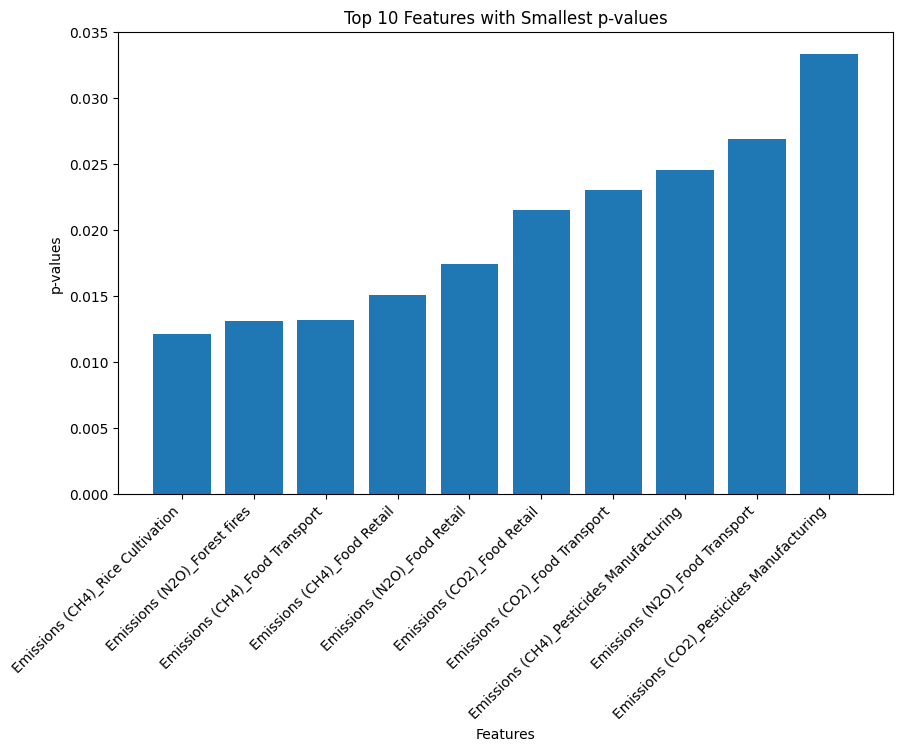

In [ ]:
from scipy.stats import f_oneway

target_variable = df['Surface Temperature']
features = df.drop(columns=['Surface Temperature','Country','Year','Temperature Index','Rice Production(Tonne)'])

p_values = {}

for feature in features.columns:
    statistic, p_value = f_oneway(*[group[1] for group in df.groupby('Surface Temperature')[feature]])
    p_values[feature] = p_value

top_10_features = sorted(p_values, key=p_values.get)[:10]

print("Top 10 features with smallest p-values:")
for feature in top_10_features:
    print(feature, "-", p_values[feature])

features_list = []
p_values_list = []

for feature in top_10_features:
    features_list.append(feature)
    p_values_list.append(p_values[feature])

plt.figure(figsize=(10, 6))
plt.bar(features_list, p_values_list)
plt.xlabel('Features')
plt.ylabel('p-values')
plt.title('Top 10 Features with Smallest p-values')
plt.xticks(rotation=45, ha='right')
plt.show()

# Classification

## Logistic Regression

In [ ]:
# # Encode 'Surface Temperature' column
# label_mapping = {'increase': 1, 'decrease': 0}
# y_test_encoded = y_test.map(label_mapping)

# # Logistic Regression
# print('Logistic Regression')
# log_reg = LogisticRegression(max_iter=100000)
# log_reg.fit(oversampled_X_train, oversampled_y_train)
# log_predictions = log_reg.predict(X_test)

# log_accuracy = accuracy_score(y_test_encoded, log_predictions)
# log_precision = precision_score(y_test_encoded, log_predictions)
# log_recall = recall_score(y_test_encoded, log_predictions)
# log_roc_auc = roc_auc_score(y_test_encoded, log_predictions)
# log_logloss = log_loss(y_test_encoded, log_predictions)
# log_f1 = f1_score(y_test_encoded, log_predictions)

# print("Logistic Regression Accuracy:", log_accuracy)
# print("Logistic Regression Precision:", log_precision)
# print("Logistic Regression Recall:", log_recall)
# print("Logistic Regression ROC-AUC:", log_roc_auc)
# print("Logistic Regression Log Loss:", log_logloss)
# print("F1 Score:", log_f1)

In [ ]:
# Logistic Regression Classifier
print('Logistic Regression')
log_reg = LogisticRegression(max_iter=100000, solver='sag')
log_reg.fit(oversampled_X_train, oversampled_y_train)
log_predictions = log_reg.predict(X_test)
log_probabilities = log_reg.predict_proba(X_test)[:, 1]

log_accuracy = accuracy_score(y_test, log_predictions)
print("Logistic Regression Accuracy:", log_accuracy)

log_precision = precision_score(y_test, log_predictions, pos_label='increase')
print("Logistic Regression Precision:", log_precision)

log_recall = recall_score(y_test, log_predictions, pos_label='increase')
print("Logistic Regression Recall:", log_recall)

log_roc_auc = roc_auc_score(y_test, log_probabilities)
print("Logistic Regression ROC-AUC:", log_roc_auc)

log_logloss = log_loss(y_test, log_probabilities)
print("Logistic Regression Log Loss:", log_logloss)

log_f1 = f1_score(y_test, log_predictions, pos_label='increase')
print("Logistic Regression F1 Score:", log_f1)

Logistic Regression
Logistic Regression Accuracy: 0.5706666666666667
Logistic Regression Precision: 0.5223367697594502
Logistic Regression Recall: 0.8735632183908046
Logistic Regression ROC-AUC: 0.7733459141076228
Logistic Regression Log Loss: 0.5965299684106367
Logistic Regression F1 Score: 0.653763440860215


In [ ]:
# Cross-validation
cv_scores = cross_val_score(log_reg, oversampled_X_train, oversampled_y_train, cv=5)
print("Cross-validation Accuracy:", cv_scores.mean())

Cross-validation Accuracy: 0.6138751393534003


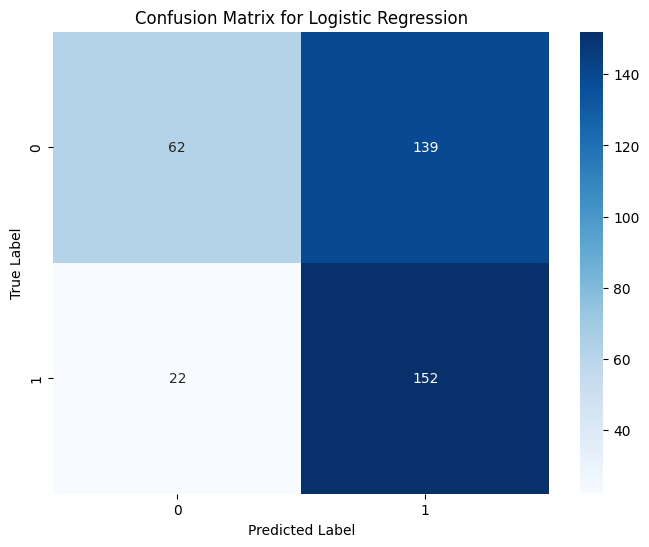

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, log_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

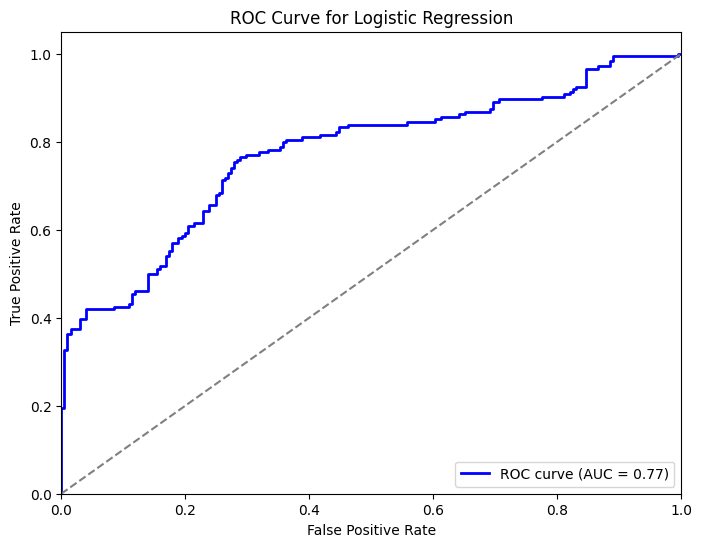

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_probabilities, pos_label='increase')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, log_probabilities))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

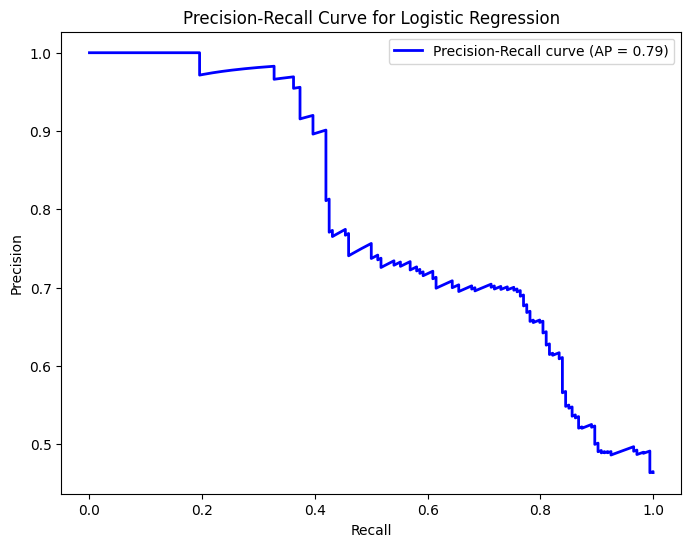

In [ ]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, log_probabilities, pos_label='increase')

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_score(y_test, log_probabilities, pos_label='increase'))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='upper right')
plt.show()

## Random Forrest Classifier

In [ ]:
# Random Forest Classifier
print('Random Forest Classifier')
rf_model = RandomForestClassifier()
rf_model.fit(oversampled_X_train, oversampled_y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

rf_precision = precision_score(y_test, rf_predictions, pos_label='increase')
print("Random Forest Precision:", rf_precision)

rf_recall = recall_score(y_test, rf_predictions, pos_label='increase')
print("Random Forest Recall:", rf_recall)

rf_roc_auc = roc_auc_score(y_test, rf_probabilities)
print("Random Forest ROC-AUC:", rf_roc_auc)

rf_logloss = log_loss(y_test, rf_probabilities)
print("Random Forest Log Loss:", rf_logloss)

rf_f1 = f1_score(y_test, rf_predictions, pos_label='increase')
print("F1 Score:", rf_f1)

Random Forest Classifier
Random Forest Accuracy: 0.9573333333333334
Random Forest Precision: 0.9540229885057471
Random Forest Recall: 0.9540229885057471
Random Forest ROC-AUC: 0.9941099102190198
Random Forest Log Loss: 0.1072632315083797
F1 Score: 0.9540229885057472


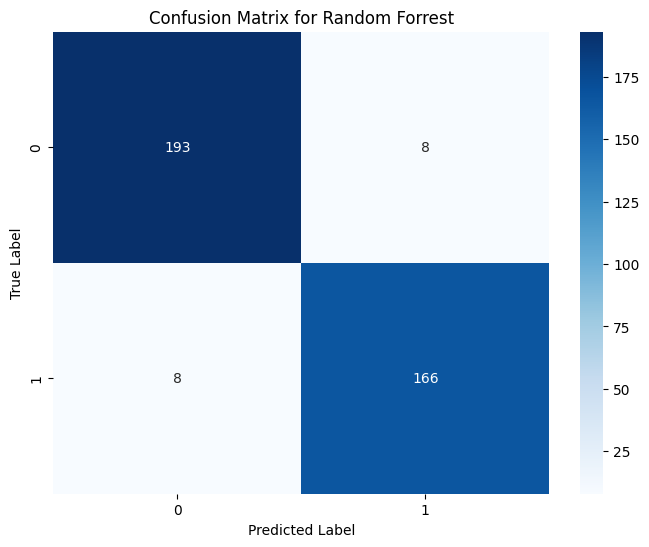

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forrest')
plt.show()

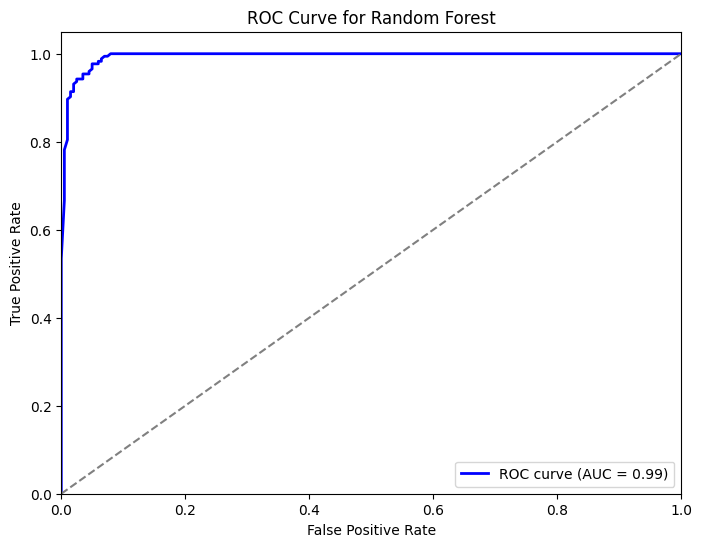

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probabilities, pos_label='increase')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, rf_probabilities))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

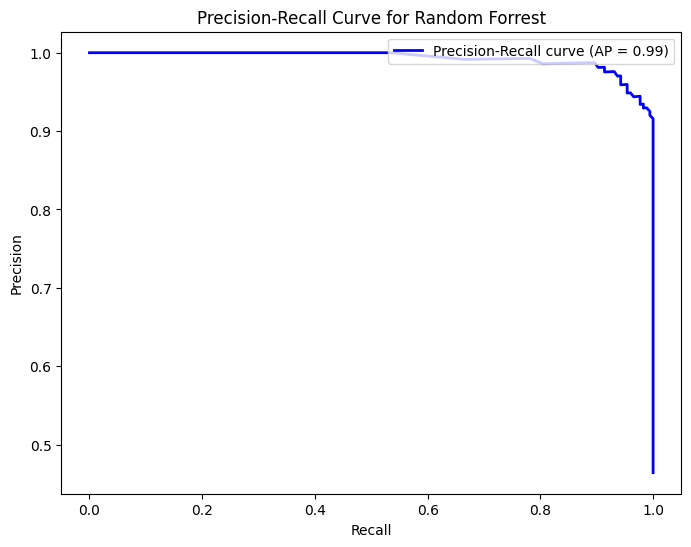

In [ ]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, rf_probabilities, pos_label='increase')

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_score(y_test, rf_probabilities, pos_label='increase'))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forrest')
plt.legend(loc='upper right')
plt.show()

## Support Vector Machine Classifier

In [ ]:
# Support Vector Machine Classifier
print('Suppoert Vector Machine Classifier')
svm_model = SVC()
svm_model = SVC(probability=True)  # Enable probability estimates
svm_model.fit(oversampled_X_train, oversampled_y_train)
svm_predictions = svm_model.predict(X_test)
svm_probabilities = svm_model.predict_proba(X_test)[:, 1]

svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

svm_precision = precision_score(y_test, svm_predictions, pos_label='increase')
print("SVM Precision:", svm_precision)

svm_recall = recall_score(y_test, svm_predictions, pos_label='increase')
print("SVM Recall:", svm_recall)

svm_roc_auc = roc_auc_score(y_test, svm_probabilities)
print("SVM ROC-AUC:", svm_roc_auc)

svm_logloss = log_loss(y_test, svm_probabilities)
print("SVM Log Loss:", svm_logloss)

svm_f1 = f1_score(y_test, svm_predictions, pos_label='increase')
print("F1 Score:", svm_f1)

Suppoert Vector Machine Classifier
SVM Accuracy: 0.64
SVM Precision: 0.819672131147541
SVM Recall: 0.28735632183908044
SVM ROC-AUC: 0.6805055183850861
SVM Log Loss: 0.6397944849436112
F1 Score: 0.42553191489361697


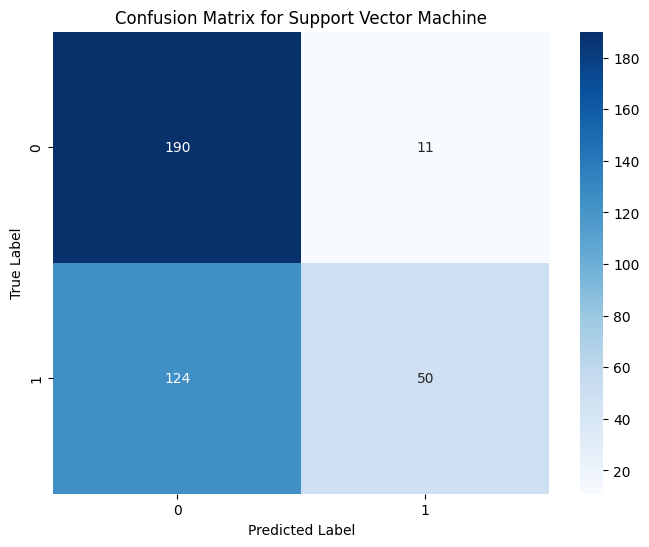

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

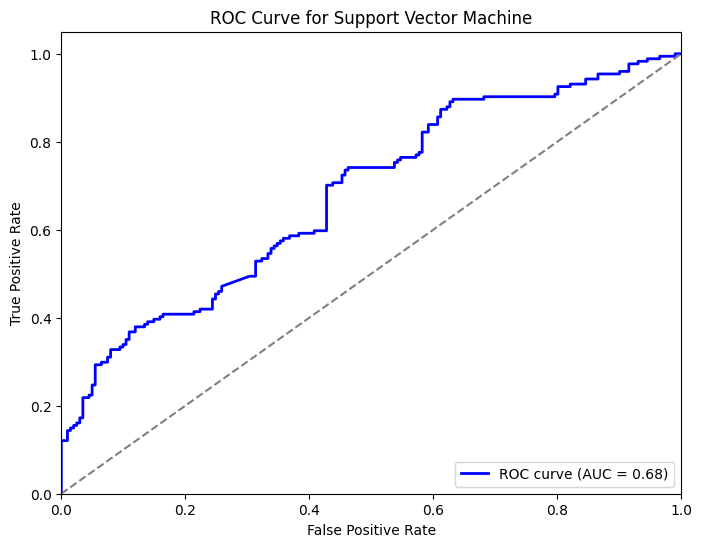

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm_probabilities, pos_label='increase')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, svm_probabilities))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine')
plt.legend(loc='lower right')
plt.show()

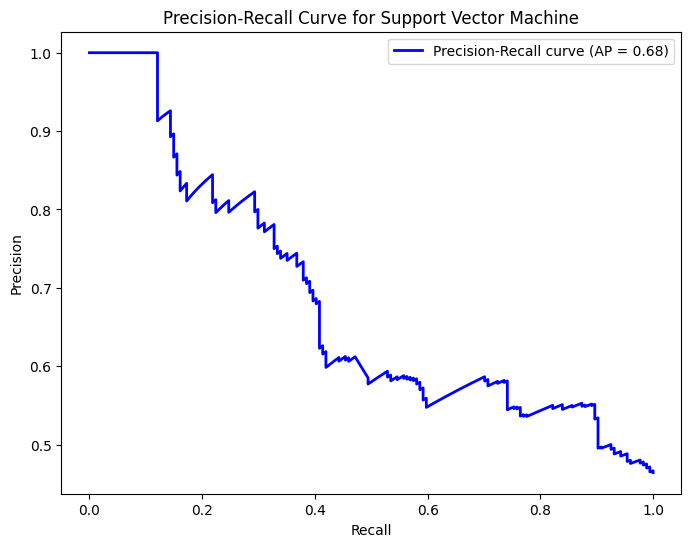

In [ ]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, svm_probabilities, pos_label='increase')

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_score(y_test, svm_probabilities, pos_label='increase'))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Support Vector Machine')
plt.legend(loc='upper right')
plt.show()

### AdaBoost Classifier (To Improve Support Vector Machine Classifier)

In [ ]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
print('AdaBoost Classifier on top of Support Vector Classifier')

# Initialize SVC as the base estimator
svc_base = SVC(probability=True, random_state=42)

ada_boost = AdaBoostClassifier(estimator=svc_base, n_estimators=50, random_state=42)
ada_boost.fit(oversampled_X_train, oversampled_y_train)
ada_boost_predictions = ada_boost.predict(X_test)
ada_boost_probabilities = ada_boost.predict_proba(X_test)[:, 1]

ada_boost_accuracy = accuracy_score(y_test, ada_boost_predictions)
print("AdaBoost SVC Accuracy:", ada_boost_accuracy)

ada_boost_precision = precision_score(y_test, ada_boost_predictions, pos_label='increase')
print("AdaBoost SVC Precision:", ada_boost_precision)

ada_boost_recall = recall_score(y_test, ada_boost_predictions, pos_label='increase')
print("AdaBoost SVC Recall:", ada_boost_recall)

ada_boost_roc_auc = roc_auc_score(y_test, ada_boost_probabilities)
print("AdaBoost SVC ROC-AUC:", ada_boost_roc_auc)

ada_boost_logloss = log_loss(y_test, ada_boost_probabilities)
print("AdaBoost SVC Log-Loss:", ada_boost_logloss)

ada_boost_f1 = f1_score(y_test, ada_boost_predictions, pos_label='increase')
print("AdaBoost SVC F1 Score:", ada_boost_f1)

AdaBoost Classifier on top of Support Vector Classifier
AdaBoost SVC Accuracy: 0.6133333333333333
AdaBoost SVC Precision: 0.7164179104477612
AdaBoost SVC Recall: 0.27586206896551724
AdaBoost SVC ROC-AUC: 0.6252358895179275
AdaBoost SVC Log-Loss: 0.6697479680723394
AdaBoost SVC F1 Score: 0.3983402489626556


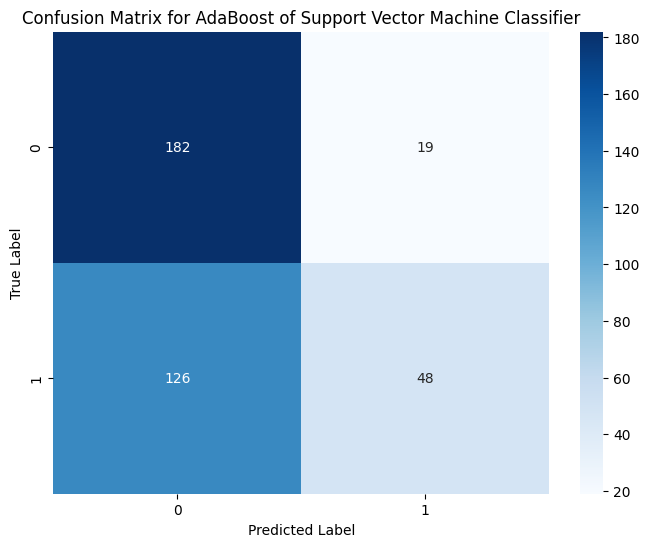

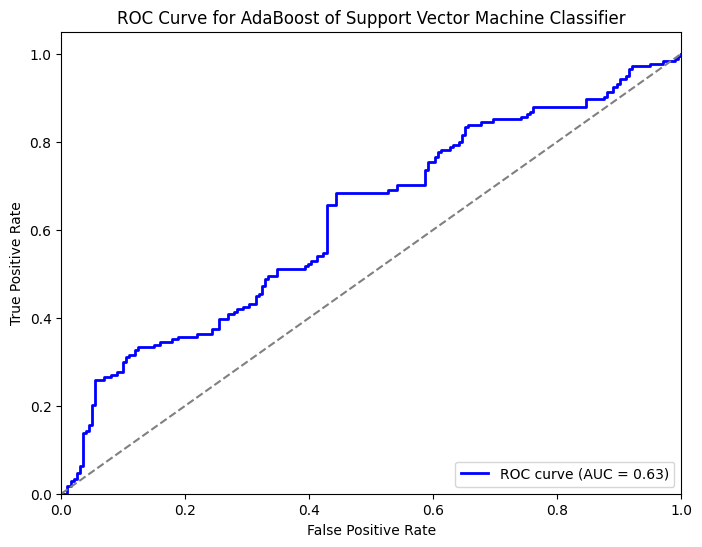

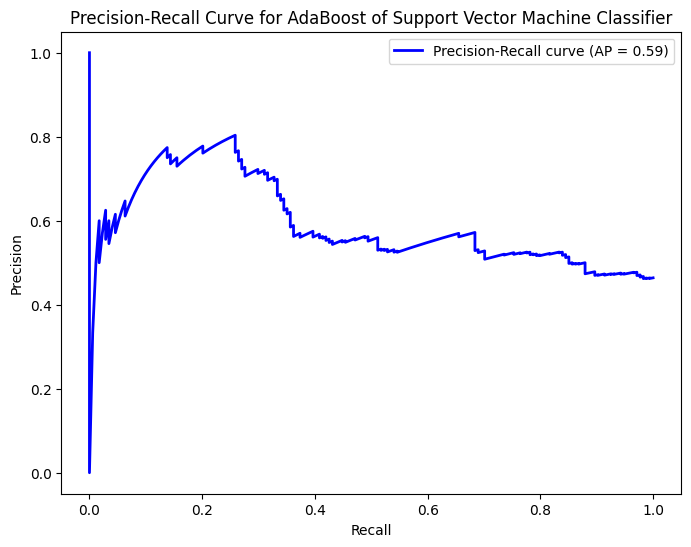

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, ada_boost_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost of Support Vector Machine Classifier')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ada_boost_probabilities, pos_label='increase')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, ada_boost_probabilities))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost of Support Vector Machine Classifier')
plt.legend(loc='lower right')
plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, ada_boost_probabilities, pos_label='increase')

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_score(y_test, ada_boost_probabilities, pos_label='increase'))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for AdaBoost of Support Vector Machine Classifier')
plt.legend(loc='upper right')
plt.show()

### Gradient Boosting (To Improve Support Vector Machine Classifier)

In [ ]:
# Gradient Boosting Classifier on top of Support Vector Classifier
from sklearn.ensemble import GradientBoostingClassifier
print('Gradient Boosting Classifier on top of Support Vector Classifier')
gb_model_classifier = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model_classifier.fit(oversampled_X_train, oversampled_y_train)
gb_model_predictions = gb_model_classifier.predict(X_test)
gb_model_probabilities = gb_model_classifier.predict_proba(X_test)[:, 1]

gb_model_classifier_accuracy = accuracy_score(y_test, gb_model_predictions)
print("Gradient Boosting SVC Accuracy:", gb_model_classifier_accuracy)

gb_model_classifier_precision = precision_score(y_test, gb_model_predictions, pos_label='increase')
print("Gradient Boosting SVC Precision:", gb_model_classifier_precision)

gb_model_classifier_recall = recall_score(y_test, gb_model_predictions, pos_label='increase')
print("Gradient Boosting SVC Recall:", gb_model_classifier_recall)

gb_model_classifier_roc_auc = roc_auc_score(y_test, gb_model_probabilities)
print("Gradient Boosting SVC ROC-AUC:", gb_model_classifier_roc_auc)

gb_model_classifier_logloss = log_loss(y_test, gb_model_probabilities)
print("Gradient Boosting SVC Log-Loss:", gb_model_classifier_logloss)

gb_model_classifer_f1 = f1_score(y_test, gb_model_predictions, pos_label='increase')
print("Gradient Boosting SVC F1 Score:", gb_model_classifer_f1)

Gradient Boosting Classifier on top of Support Vector Classifier
Gradient Boosting SVC Accuracy: 0.9413333333333334
Gradient Boosting SVC Precision: 0.9634146341463414
Gradient Boosting SVC Recall: 0.9080459770114943
Gradient Boosting SVC ROC-AUC: 0.9838165494367245
Gradient Boosting SVC Log-Loss: 0.2068632982511707
Gradient Boosting SVC F1 Score: 0.9349112426035503


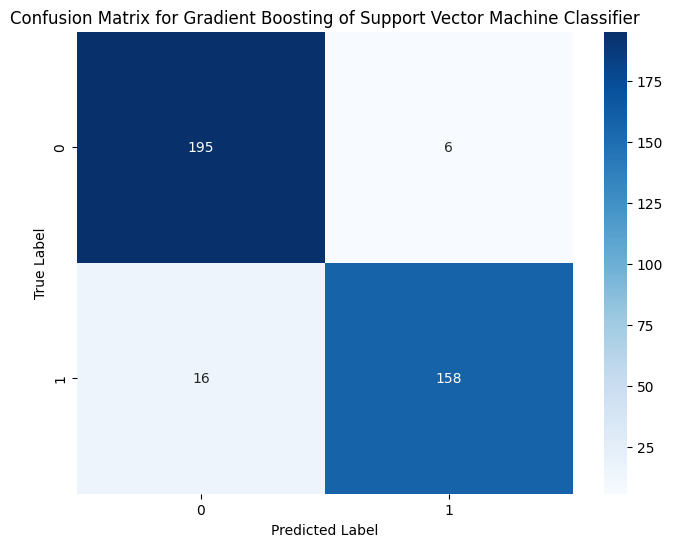

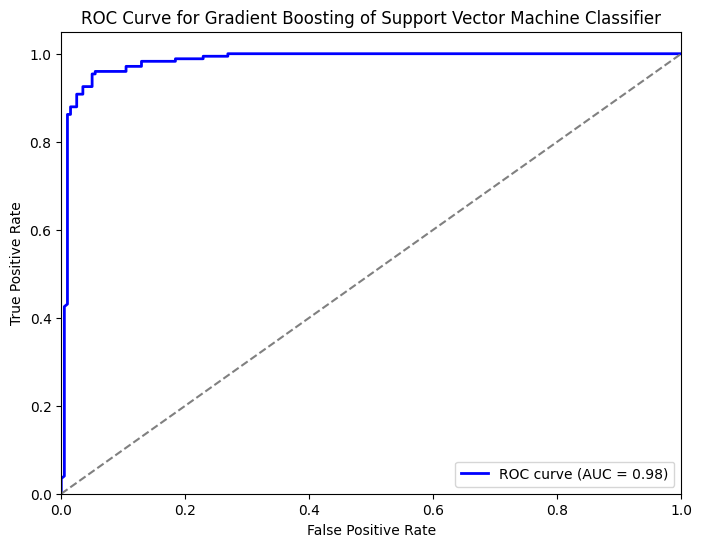

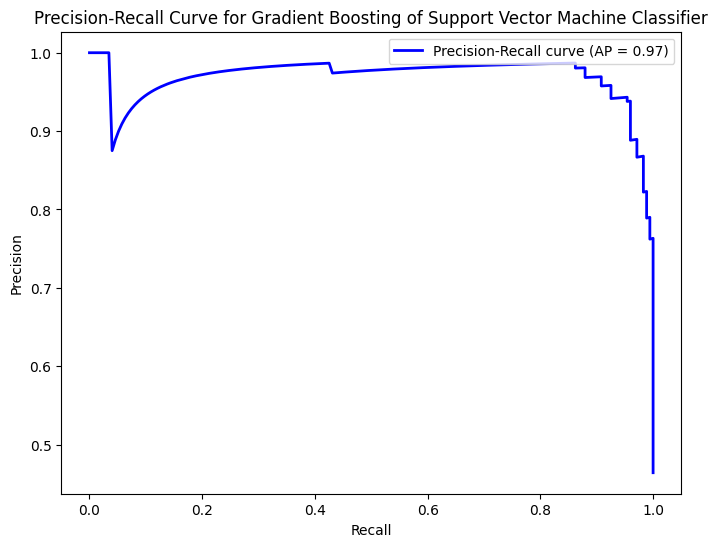

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, gb_model_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Gradient Boosting of Support Vector Machine Classifier')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_model_probabilities, pos_label='increase')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, gb_model_probabilities))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting of Support Vector Machine Classifier')
plt.legend(loc='lower right')
plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, gb_model_probabilities, pos_label='increase')

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_score(y_test, gb_model_probabilities, pos_label='increase'))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting of Support Vector Machine Classifier')
plt.legend(loc='upper right')
plt.show()

## Neural Network Classifier

In [ ]:
# Neural Network Classifier
print('Neural Network Classifier')
nn_model = MLPClassifier()
nn_model.fit(oversampled_X_train, oversampled_y_train)
nn_predictions = nn_model.predict(X_test)
nn_probabilities = nn_model.predict_proba(X_test)[:, 1]

nn_accuracy = accuracy_score(y_test, nn_predictions)
print("NN Classifier Accuracy:", nn_accuracy)

nn_precision = precision_score(y_test, nn_predictions, pos_label='increase')
print("NN Classifier Precision:", nn_precision)

nn_recall = recall_score(y_test, nn_predictions, pos_label='increase')
print("NN Classifier Recall:", nn_recall)

nn_roc_auc = roc_auc_score(y_test, nn_probabilities)
print("NN Classifier ROC-AUC:", nn_roc_auc)

nn_logloss = log_loss(y_test, nn_probabilities)
print("NN Classifier Log Loss:", nn_logloss)

nn_f1 = f1_score(y_test, nn_predictions, pos_label='increase')
print("NN Classifier F1 Score:", nn_f1)

Neural Network Classifier
NN Classifier Accuracy: 0.7653333333333333
NN Classifier Precision: 0.7792207792207793
NN Classifier Recall: 0.6896551724137931
NN Classifier ROC-AUC: 0.823039972551038
NN Classifier Log Loss: 4.689338859385112
NN Classifier F1 Score: 0.7317073170731708


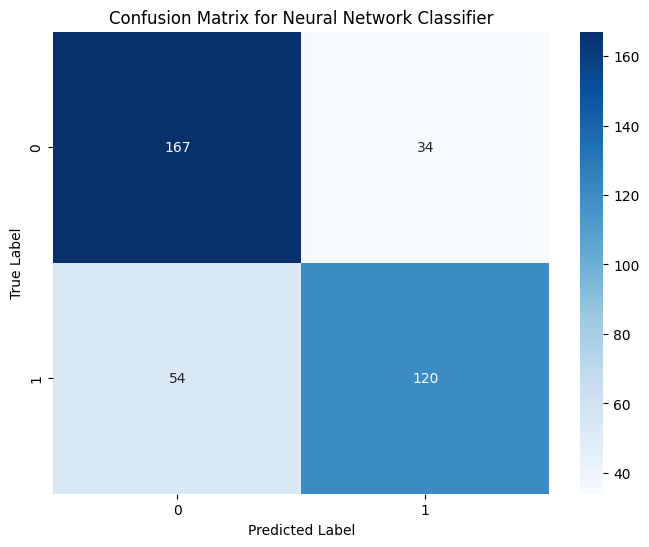

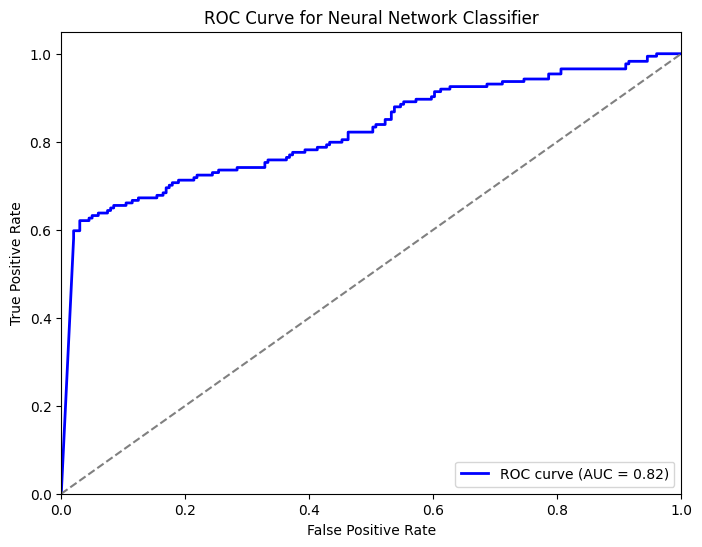

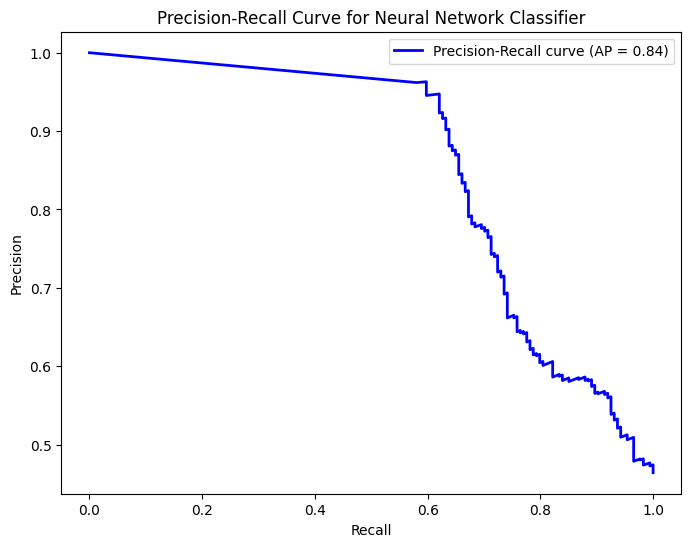

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, nn_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Neural Network Classifier')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, nn_probabilities, pos_label='increase')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, nn_probabilities))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Neural Network Classifier')
plt.legend(loc='lower right')
plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, nn_probabilities, pos_label='increase')

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_score(y_test, nn_probabilities, pos_label='increase'))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Neural Network Classifier')
plt.legend(loc='upper right')
plt.show()

## K-Nearest Neighbours Classifier

In [ ]:
# KNN classifier
print('K-Nearest Neighbours Classifier')
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(oversampled_X_train, oversampled_y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_probabilities = knn_classifier.predict_proba(X_test)[:, 1]

knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

knn_precision = precision_score(y_test, knn_predictions, pos_label='increase')
print("KNN Precision:", knn_precision)

knn_recall = recall_score(y_test, knn_predictions, pos_label='increase')
print("KNN Recall:", knn_recall)

knn_roc_auc = roc_auc_score(y_test, knn_probabilities)
print("KNN ROC-AUC:", knn_roc_auc)

knn_logloss = log_loss(y_test, knn_probabilities)
print("KNN Log-Loss:", knn_logloss)

knn_f1 = f1_score(y_test, knn_predictions, pos_label='increase')
print("KNN F1 Score:", knn_f1)

K-Nearest Neighbours Classifier
KNN Accuracy: 0.8746666666666667
KNN Precision: 0.9205298013245033
KNN Recall: 0.7988505747126436
KNN ROC-AUC: 0.9357522731171727
KNN Log-Loss: 1.2388138044239987
KNN F1 Score: 0.8553846153846154


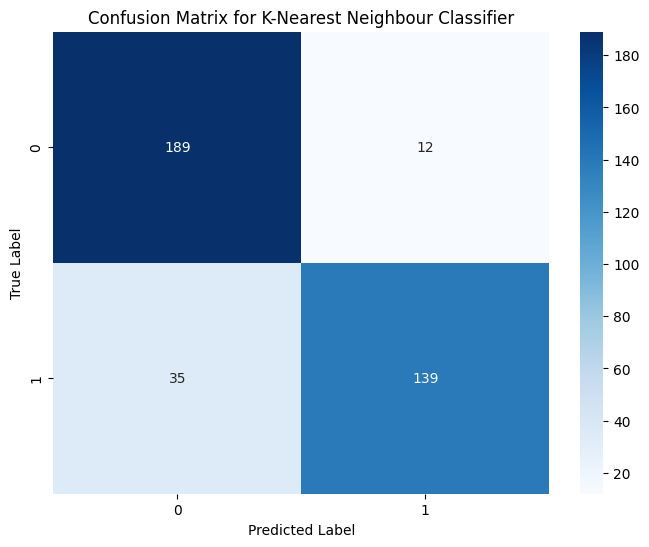

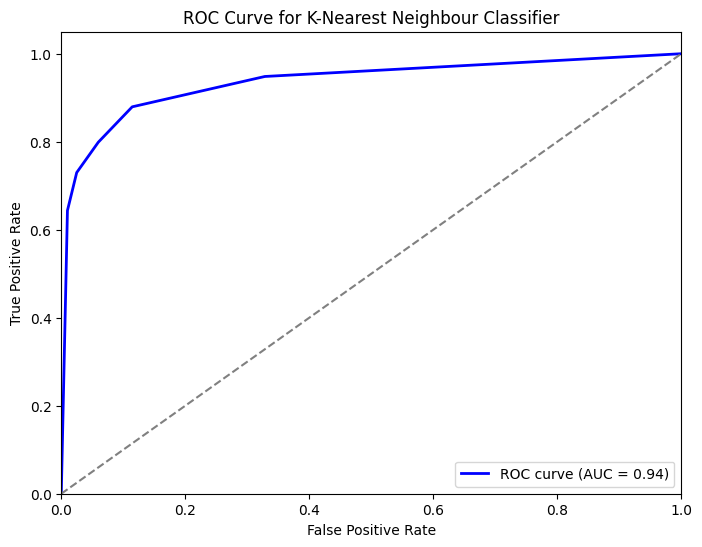

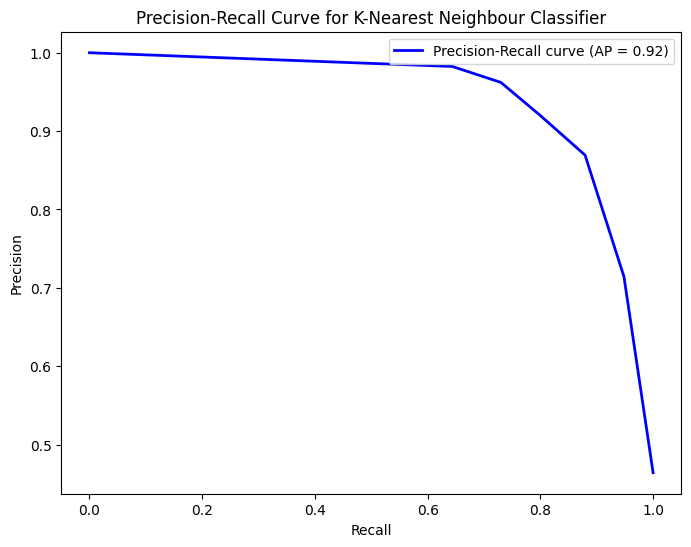

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, knn_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for K-Nearest Neighbour Classifier')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn_probabilities, pos_label='increase')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, knn_probabilities))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-Nearest Neighbour Classifier')
plt.legend(loc='lower right')
plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, knn_probabilities, pos_label='increase')

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_score(y_test, knn_probabilities, pos_label='increase'))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for K-Nearest Neighbour Classifier')
plt.legend(loc='upper right')
plt.show()

## Decision Tree Classifier

In [ ]:
# Decision Tree Classifier
print("Decision Tree Classifier")
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(oversampled_X_train, oversampled_y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_probabilities = dt_classifier.predict_proba(X_test)[:, 1]

dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

dt_precision = precision_score(y_test, dt_predictions, pos_label='increase')
print("Decision Tree Precision:", dt_precision)

dt_recall = recall_score(y_test, dt_predictions, pos_label='increase')
print("Decision Tree Recall:", dt_recall)

dt_roc_auc = roc_auc_score(y_test, dt_probabilities)
print("Decision Tree ROC-AUC:", dt_roc_auc)

dt_logloss = log_loss(y_test, dt_probabilities)
print("Decision Tree Accuracy:", dt_logloss)

dt_f1 = f1_score(y_test, dt_predictions, pos_label='increase')
print("Decision Tree F1 Score:", dt_f1)

Decision Tree Accuracy: 0.9546666666666667
Decision Tree Precision: 0.9485714285714286
Decision Tree Recall: 0.9540229885057471
Decision Tree ROC-AUC: 0.954623434551381
Decision Tree Accuracy: 1.6339789536399776
Decision Tree F1 Score: 0.9512893982808024


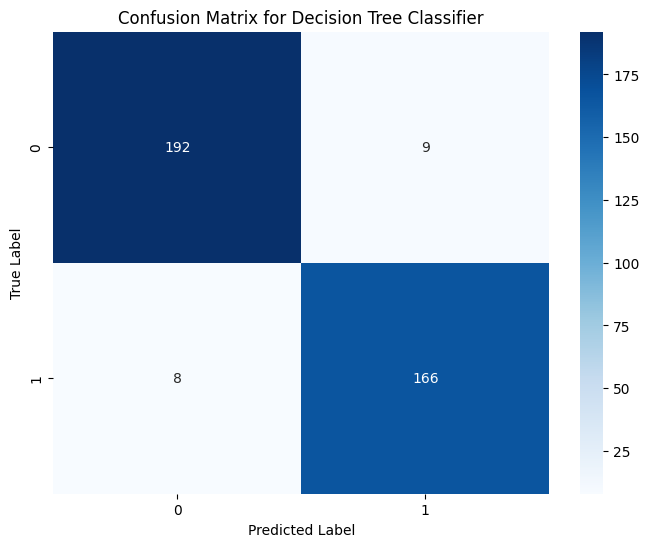

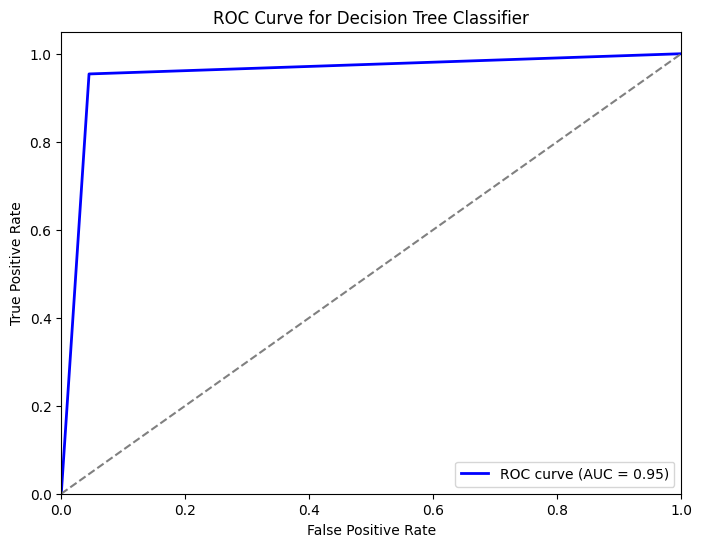

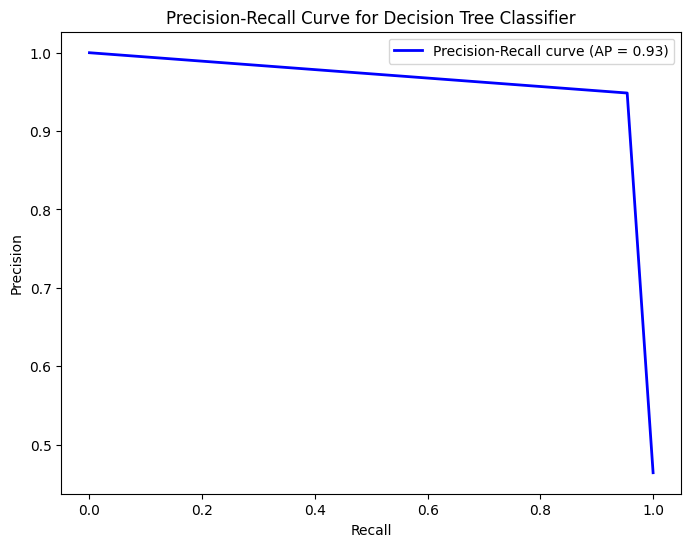

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, dt_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dt_probabilities, pos_label='increase')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, dt_probabilities))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, dt_probabilities, pos_label='increase')

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_score(y_test, dt_probabilities, pos_label='increase'))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree Classifier')
plt.legend(loc='upper right')
plt.show()

## Gaussian Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Gaussian Naive Bayes Classifier
print('Gaussian Naive Bayes Classifier')
nb_classifier = GaussianNB()
nb_classifier.fit(oversampled_X_train, oversampled_y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_probabilities = dt_classifier.predict_proba(X_test)[:, 1]

nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

nb_precision = precision_score(y_test, nb_predictions, pos_label='increase')
print("Naive Bayes Precision:", nb_precision)

nb_recall = recall_score(y_test, nb_predictions, pos_label='increase')
print("Naive Bayes Recall:", nb_recall)

nb_roc_auc = roc_auc_score(y_test, nb_probabilities)
print("Naive Bayes ROC-AUC:", nb_roc_auc)

nb_logloss = log_loss(y_test, nb_probabilities)
print("Naive Bayes Accuracy:", nb_logloss)

nb_f1 = f1_score(y_test, nb_predictions, pos_label='increase')
print("Naive Bayes F1 Score:", nb_f1)

Gaussian Naive Bayes Classifier
Naive Bayes Accuracy: 0.648
Naive Bayes Precision: 0.875
Naive Bayes Recall: 0.28160919540229884
Naive Bayes ROC-AUC: 0.954623434551381
Naive Bayes Accuracy: 1.6339789536399776
Naive Bayes F1 Score: 0.42608695652173917


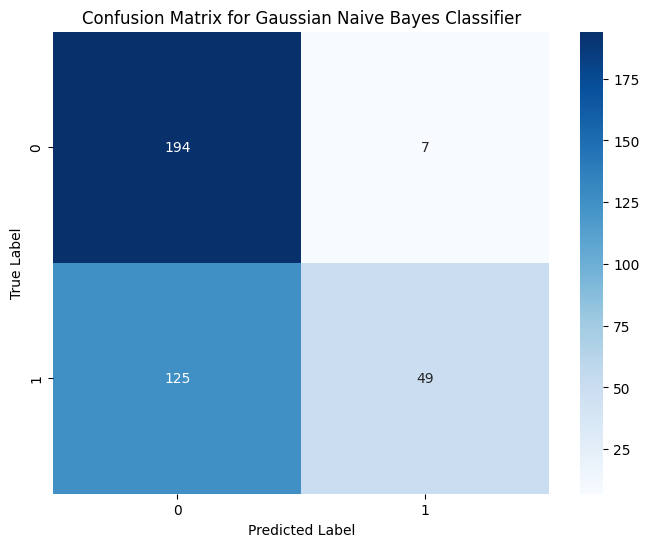

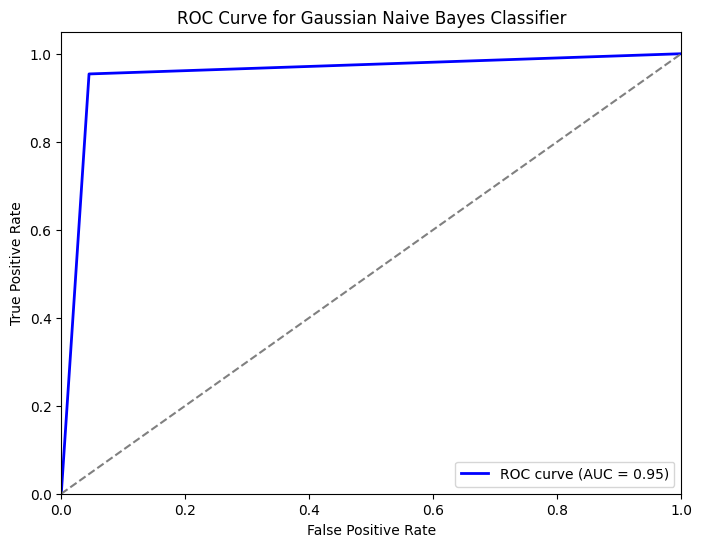

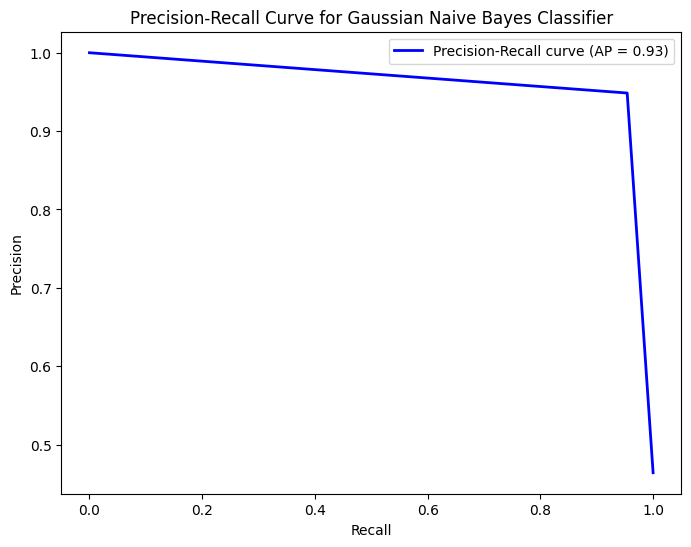

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, nb_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, nb_probabilities, pos_label='increase')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, nb_probabilities))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, nb_probabilities, pos_label='increase')

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_score(y_test, nb_probabilities, pos_label='increase'))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gaussian Naive Bayes Classifier')
plt.legend(loc='upper right')
plt.show()

### Gradient Boosting (To Improve Gaussian Naive Bayes)

In [ ]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
print('Gradient Boosting Classifier on top of Gaussian Naive Bayes')
gb_classifier = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_classifier.fit(oversampled_X_train, oversampled_y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_probabilities = gb_classifier.predict_proba(X_test)[:, 1]

gb_accuracy = gb_classifier.score(X_test, y_test)
print("Gradient Boosting after adding Base Naive Bayes Accuracy:", gb_accuracy)

gb_precision = precision_score(y_test, gb_predictions, pos_label='increase')
print("AdaBoost SVC Precision:", gb_precision)

gb_recall = recall_score(y_test, gb_predictions, pos_label='increase')
print("AdaBoost SVC Recall:", gb_recall)

gb_roc_auc = roc_auc_score(y_test, gb_probabilities)
print("AdaBoost SVC ROC-AUC:", gb_roc_auc)

gb_logloss = log_loss(y_test, gb_probabilities)
print("AdaBoost SVC Log-Loss:", gb_logloss)

gb_f1 = f1_score(y_test, gb_predictions, pos_label='increase')
print("AdaBoost SVC F1 Score:", gb_f1)

Gradient Boosting Classifier on top of Gaussian Naive Bayes
Gradient Boosting after adding Base Naive Bayes Accuracy: 0.9413333333333334
AdaBoost SVC Precision: 0.9634146341463414
AdaBoost SVC Recall: 0.9080459770114943
AdaBoost SVC ROC-AUC: 0.9838165494367245
AdaBoost SVC Log-Loss: 0.2068632982511707
AdaBoost SVC F1 Score: 0.9349112426035503


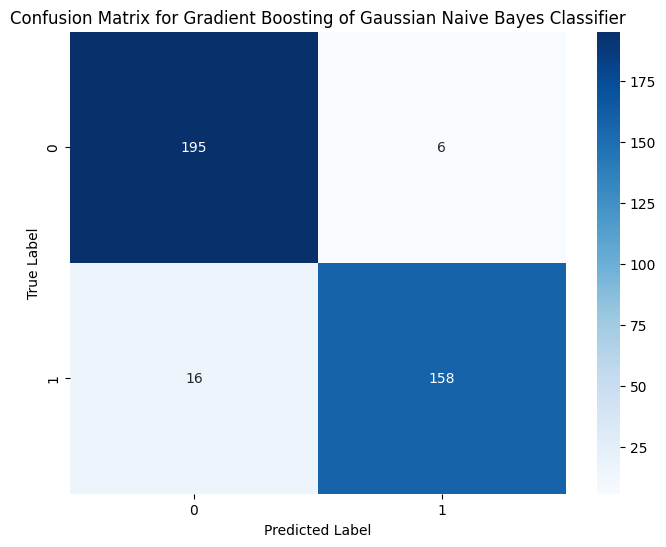

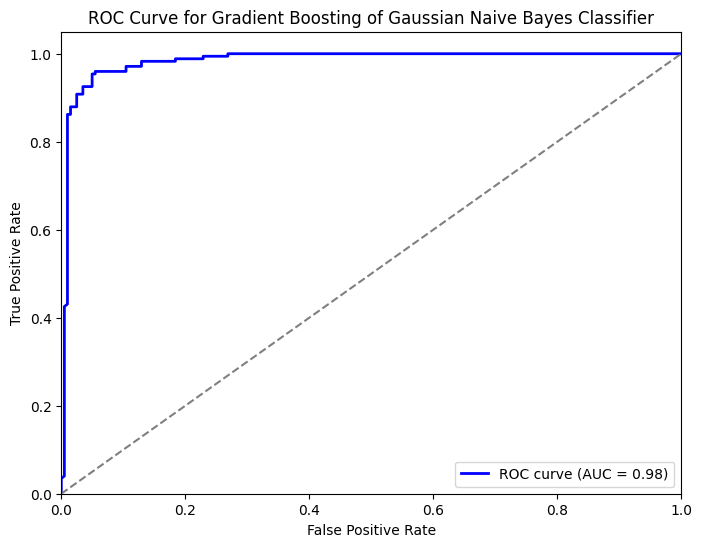

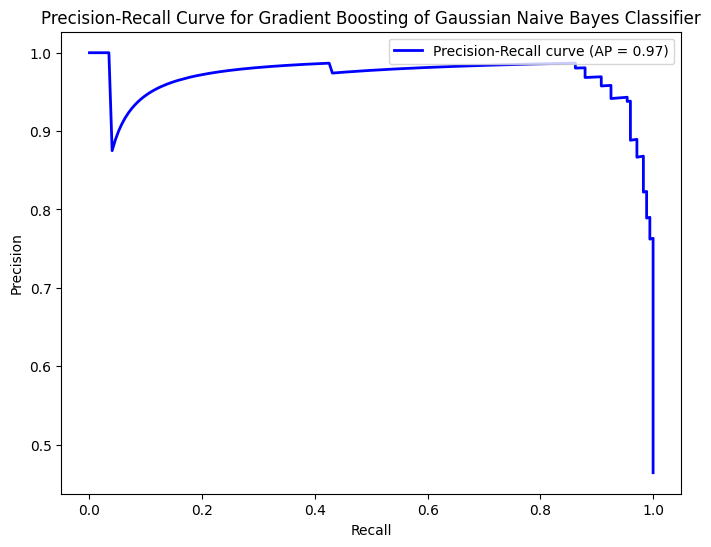

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, gb_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Gradient Boosting of Gaussian Naive Bayes Classifier')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_probabilities, pos_label='increase')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, gb_probabilities))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting of Gaussian Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, gb_probabilities, pos_label='increase')

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_score(y_test, gb_probabilities, pos_label='increase'))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting of Gaussian Naive Bayes Classifier')
plt.legend(loc='upper right')
plt.show()

### AdaBoost Classifier (To Improve Gaussian Naive Bayes Classifier)

In [ ]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
print('AdaBoost Classifier on top of Gaussian Naive Bayes')
ada = AdaBoostClassifier(estimator=GaussianNB(), n_estimators=50, random_state=42)
ada.fit(oversampled_X_train, oversampled_y_train)
ada_predictions = ada.predict(X_test)
ada_probabilities = ada.predict_proba(X_test)[:, 1]

# Evaluate AdaBoost with SVC model
ada_accuracy = accuracy_score(y_test, ada_predictions)
print("AdaBoost SVC Accuracy:", ada_accuracy)

ada_precision = precision_score(y_test, ada_predictions, pos_label='increase')
print("AdaBoost SVC Precision:", ada_precision)

ada_recall = recall_score(y_test, ada_predictions, pos_label='increase')
print("AdaBoost SVC Recall:", ada_recall)

ada_roc_auc = roc_auc_score(y_test, ada_probabilities)
print("AdaBoost SVC ROC-AUC:", ada_roc_auc)

ada_logloss = log_loss(y_test, ada_probabilities)
print("AdaBoost SVC Log-Loss:", ada_logloss)

ada_f1 = f1_score(y_test, ada_predictions, pos_label='increase')
print("AdaBoost SVC F1 Score:", ada_f1)

AdaBoost Classifier on top of Gaussian Naive Bayes
AdaBoost SVC Accuracy: 0.64
AdaBoost SVC Precision: 0.6077348066298343
AdaBoost SVC Recall: 0.632183908045977
AdaBoost SVC ROC-AUC: 0.7211357008063133
AdaBoost SVC Log-Loss: 0.6431041185277793
AdaBoost SVC F1 Score: 0.619718309859155


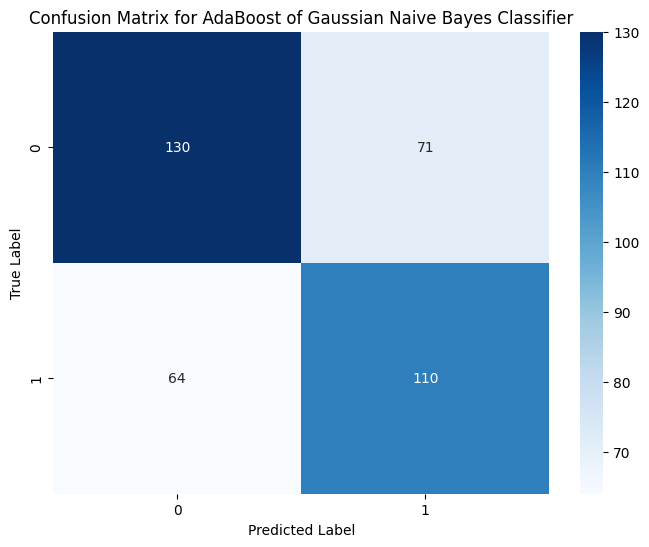

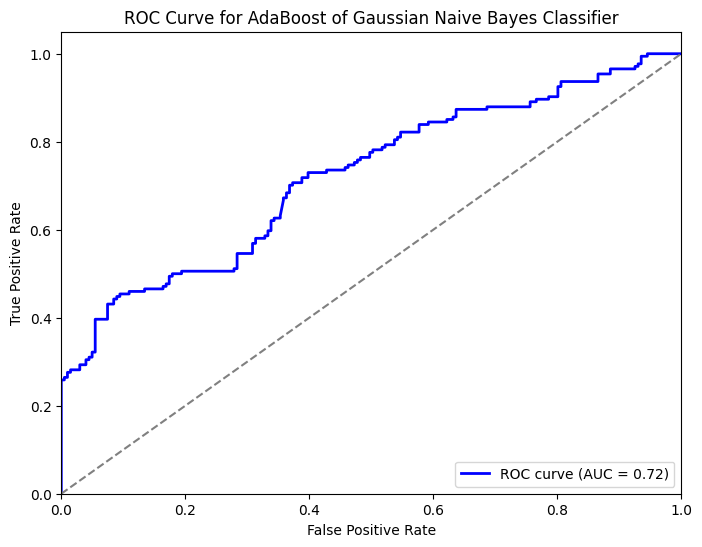

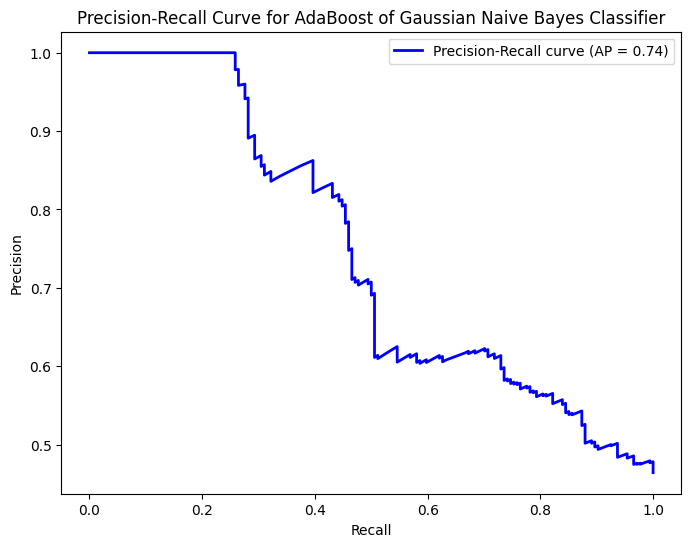

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, ada_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for AdaBoost of Gaussian Naive Bayes Classifier')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ada_probabilities, pos_label='increase')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_test, ada_probabilities))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost of Gaussian Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, ada_probabilities, pos_label='increase')

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision_score(y_test, ada_probabilities, pos_label='increase'))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for AdaBoost of Gaussian Naive Bayes Classifier')
plt.legend(loc='upper right')
plt.show()

# Export dataset in .csv format

In [ ]:
# Print out current dataset in a csv file
df.to_csv('updated_dataset.csv', index=False)